In [10]:
import torch
from torch import nn
from d2l import torch as d2l

batch_size = 256
train_iter, test_iter = d2l.load_data_fashion_mnist(batch_size)

In [11]:
# PyTorch不会隐式地调整输入的形状。因此，
# 我们在线性层前定义了展平层（flatten），来调整网络输入的形状
net = nn.Sequential(nn.Flatten(), nn.Linear(784, 10)) 
#nn.Sequential：一个顺序容器，会按给出的顺序，把层依次连接起来。它本身是nn.Module的子类，故此处net是一个标准的nn.Module模型。
#nn.Flatten()：展平层，作用是把输入的多维张量展平为二维张量。比如输入是一个形状为(批量大小, 1, 28, 28)的图像数据，经过展平层后会变成(批量大小, 784)，其中784=1*28*28。
#nn.Linear(784, 10)：线性层，输入特征数为784，输出特征数为10。这个层会对输入进行线性变换，计算公式为y = xW^T + b，其中x是输入，W是权重矩阵，b是偏置向量。
def init_weights(m):                        #定义一个函数init_weights，用于初始化模型的权重参数。
    if type(m) == nn.Linear:
        nn.init.normal_(m.weight, std=0.01) #当m是nn.Linear类型时，使用正态分布（均值默认为0，标准差为0.01）来初始化权重参数。

net.apply(init_weights);
#apply方法会递归地将init_weights函数应用到net的每一个子模块上。


In [12]:
loss = nn.CrossEntropyLoss(reduction='none')
#交叉熵损失函数，reduction='none'表示不对损失进行任何缩放或求和，直接返回每个样本的损失值。

In [24]:
trainer = torch.optim.SGD(net.parameters(), lr=0.15)
#优化器，使用随机梯度下降（SGD）算法，学习率为0.1。
# net.parameters()返回模型的所有可训练参数，这些参数将被优化器更新。

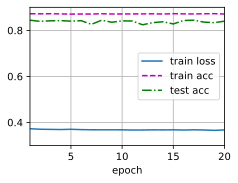

In [25]:
num_epochs =20
d2l.train_ch3(net, train_iter, test_iter, loss, num_epochs, trainer)
#训练模型，train_ch3函数会在训练集上训练模型，并在每个epoch结束后在测试集上评估模型的性能。
# 训练过程中的损失和准确率会被记录和显示。

练习1
如上
批量大小（batch_size）：
增大：梯度估计更稳定，训练速度更快，但单次迭代内存占用更高，参数更新次数减少。
减小：梯度噪声更大，模型可能跳出局部最优，但训练更慢，内存占用更低。
迭代周期（num_epochs）：
增大：模型在训练集上学得更充分，但过拟合风险升高。
减小：训练不充分，模型欠拟合。
学习率（lr）：
过大：训练不稳定，损失剧烈震荡，甚至不收敛。
过小：收敛缓慢，容易陷入局部最优。

练习2
原因：过拟合（Overfitting）
模型在训练集上不断学习，包括其中的噪声和细节，导致泛化能力下降，在未见过的测试集上表现变差。
训练集上的损失和准确率持续提升，但测试集上的准确率在达到峰值后开始下降。

解决方法：
1 早停（Early Stopping）：监控测试集准确率，当连续多轮不再提升时停止训练。
2 正则化（Regularization）：
3 L2 正则化（权重衰减）：限制权重的大小，防止模型过于复杂。
4 Dropout：在训练中随机失活部分神经元，减少神经元间的共适应。
5 数据增强（Data Augmentation）：对训练数据进行变换（如旋转、裁剪、翻转），增加数据多样性，提高模型泛化能力。
6 简化模型：减少网络层数或神经元数量，降低模型容量。
